In [ ]:
# | default_exp utils/clamping

# Imports

In [ ]:
# | export


import torch
from torch.nn import functional as F

In [ ]:
from matplotlib import pyplot as plt

# Clamping functions

In [ ]:
# | export


def symmetric_tanh_clamp(x: torch.tensor, max_value: float) -> torch.tensor:
    """
    Clamps the input tensor to the range [-max_value, max_value] using tanh while keeping it differentiable.

    Parameters:
        x: The input tensor to be clamped.
        max_value: The maximum absolute value to clamp to.

    Returns:
        Clamped differentiable tensor.
    """
    # Ensure max value is positive and greater than 0
    max_value = abs(max_value)
    if max_value == 0:
        raise ValueError("max_value must be greater than 0")

    # Clamp
    clamped_x = max_value * torch.tanh(x / max_value)
    return clamped_x

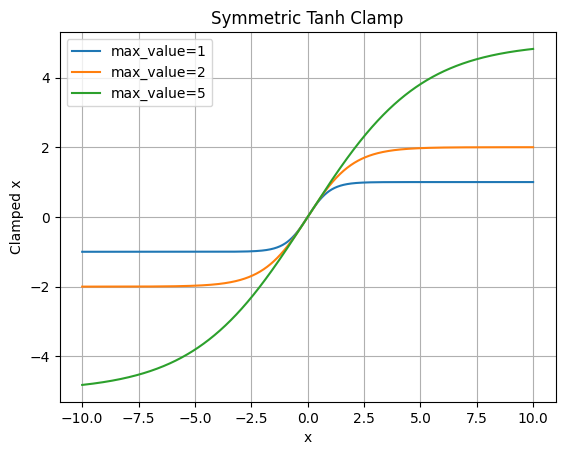

In [ ]:
x = torch.linspace(-10, 10, 1000)
for max_value in [1, 2, 5]:
    y = symmetric_tanh_clamp(x, max_value)
    plt.plot(x.numpy(), y.numpy(), label=f"max_value={max_value}")
plt.title("Symmetric Tanh Clamp")
plt.xlabel("x")
plt.ylabel("Clamped x")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# | export


def floor_softplus_clamp(x: torch.tensor, min_value: float) -> torch.tensor:
    """
    Clamps the input tensor to be greater than or equal to min_value using softplus while keeping it differentiable.

    Parameters:
        x: The input tensor to be clamped.
        min_value: The minimum value to clamp to.

    Returns:
        Clamped differentiable tensor.
    """
    # Clamp
    clamped_x = F.softplus(x - min_value) + min_value
    return clamped_x

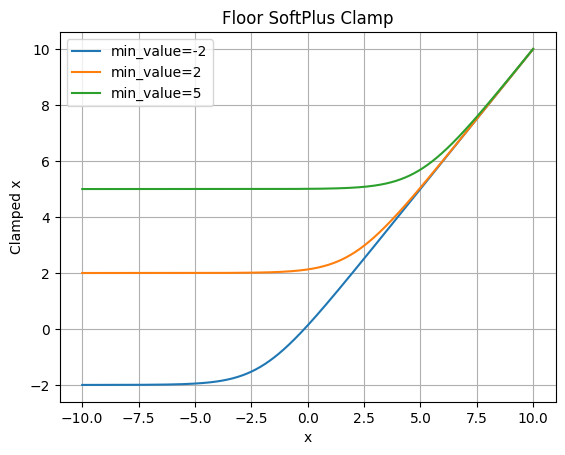

In [ ]:
x = torch.linspace(-10, 10, 1000)
for min_value in [-2, 2, 5]:
    y = floor_softplus_clamp(x, min_value)
    plt.plot(x.numpy(), y.numpy(), label=f"min_value={min_value}")
plt.title("Floor SoftPlus Clamp")
plt.xlabel("x")
plt.ylabel("Clamped x")
plt.legend()
plt.grid(True)
plt.show()

# nbdev

In [ ]:
!nbdev_export